# Tutorial TGAN

## Time-series Generative Adversarial Networks

This tutorial shows how to use TGAN to generate synthetic time-series data. We are using Google Stock and Sine dataset as examples.

Experiment Settings (Import necessary packages and functions)

In [1]:
import numpy as np
import sys

#%% Functions
# 1. Models
from tgan import tgan

# 2. Data Loading
from data_loading import google_data_loading, sine_data_generation

# 3. Metrics
sys.path.append('metrics')
from discriminative_score_metrics import discriminative_score_metrics
from visualization_metrics import PCA_Analysis, tSNE_Analysis
from predictive_score_metrics import predictive_score_metrics
print('Finish importing necessary packages and functions')


c:\Users\Paul\anaconda3\envs\capstone_iisc\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\Paul\anaconda3\envs\capstone_iisc\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\Paul\anaconda3\envs\capstone_iisc\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\Paul\anaconda3\envs\capstone_iisc\lib\site-

Finish importing necessary packages and functions


Set main parameters and datasets

In [2]:
#%% Main Parameters
# Data
data_set = ['google','sine']
data_name = data_set[1]

# Experiments iterations
Iteration = 2
Sub_Iteration = 3

#%% Data Loading
seq_length = 24

if data_name == 'google':
    dataX = google_data_loading(seq_length)
elif data_name == 'sine':
    No = 10000
    F_No = 5
    dataX = sine_data_generation(No, seq_length, F_No)

print(data_name + ' dataset is ready.')


sine dataset is ready.


Set network parameters & Output initialization

In [3]:

#%% Newtork Parameters
parameters = dict()

parameters['hidden_dim'] = len(dataX[0][0,:]) * 4
parameters['num_layers'] = 3
parameters['iterations'] = 10000
parameters['batch_size'] = 128
parameters['module_name'] = 'gru'   # Other options: 'lstm' or 'lstmLN'
parameters['z_dim'] = len(dataX[0][0,:]) 

print('Parameters are ' + str(parameters))

#%% Experiments
# Output Initialization
Discriminative_Score = list()
Predictive_Score = list()

Parameters are {'hidden_dim': 20, 'num_layers': 3, 'iterations': 10000, 'batch_size': 128, 'module_name': 'gru', 'z_dim': 5}


Run TGAN & Evaluate discriminative and predictive scores

In [4]:

print('Start iterations') 
    
# Each Iteration
for it in range(Iteration):

    
    # Synthetic Data Generation
    dataX_hat = tgan(dataX, parameters)   
      
    print('Finish Synthetic Data Generation')

    #%% Performance Metrics
    
    # 1. Discriminative Score
    Acc = list()
    for tt in range(Sub_Iteration):
        Temp_Disc = discriminative_score_metrics (dataX, dataX_hat)
        Acc.append(Temp_Disc)
    
    Discriminative_Score.append(np.mean(Acc))
    
    # 2. Predictive Performance
    MAE_All = list()
    for tt in range(Sub_Iteration):
        MAE_All.append(predictive_score_metrics (dataX, dataX_hat))
        
    Predictive_Score.append(np.mean(MAE_All))    
    
print('Finish TGAN iterations')

Start iterations
Start Embedding Network Training
step: 0, e_loss: 0.2966
step: 1000, e_loss: 0.0803
step: 2000, e_loss: 0.0538
step: 3000, e_loss: 0.0234
step: 4000, e_loss: 0.0174
step: 5000, e_loss: 0.0153
step: 6000, e_loss: 0.015
step: 7000, e_loss: 0.0135
step: 8000, e_loss: 0.0108
step: 9000, e_loss: 0.0108
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0, s_loss: 0.1406
step: 1000, s_loss: 0.0086
step: 2000, s_loss: 0.0056
step: 3000, s_loss: 0.0043
step: 4000, s_loss: 0.0035
step: 5000, s_loss: 0.0028
step: 6000, s_loss: 0.0025
step: 7000, s_loss: 0.0023
step: 8000, s_loss: 0.0019
step: 9000, s_loss: 0.0017
Finish Training with Supervised Loss Only
Start Joint Training
step: 0, d_loss: 2.1178, g_loss_u: 0.6624, g_loss_s: 0.017, g_loss_v: 0.1893, e_loss_t0: 0.1079
step: 1000, d_loss: 1.6365, g_loss_u: 1.3582, g_loss_s: 0.0055, g_loss_v: 0.0207, e_loss_t0: 0.0081
step: 2000, d_loss: 1.5849, g_loss_u: 1.4967, g_loss_s: 0.0076, g_loss_v: 0.0221, e

Visualization (PCA Analysis)

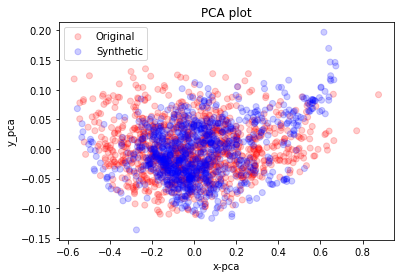

In [5]:
PCA_Analysis (dataX, dataX_hat)

Visualization (t-SNE Analysis)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.179s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.022970
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.202942
[t-SNE] KL divergence after 300 iterations: 0.929059


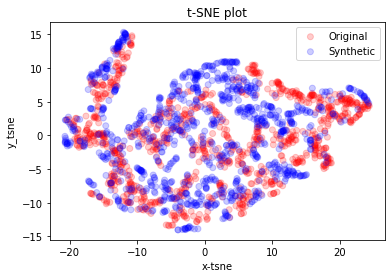

In [8]:
tSNE_Analysis (dataX, dataX_hat)

Print Discriminative and Predictive Scores

In [7]:
# Print Results
print('Discriminative Score - Mean: ' + str(np.round(np.mean(Discriminative_Score),4)) + ', Std: ' + str(np.round(np.std(Discriminative_Score),4)))
print('Predictive Score - Mean: ' + str(np.round(np.mean(Predictive_Score),4)) + ', Std: ' + str(np.round(np.std(Predictive_Score),4)))


Discriminative Score - Mean: 0.0782, Std: 0.0129
Predictive Score - Mean: 0.103, Std: 0.0003
